In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.model_selection import train_test_split

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import warnings
warnings.filterwarnings('ignore')

2023-03-20 21:36:47.096143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
(trainX, trainY), (testX, testY) = cifar10.load_data()

Data normalization 

In [16]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2)


trainX = (trainX - trainX.min()) / (trainX.max() - trainX.min())
testX = (testX - testX.min()) / (testX.max() - testX.min())
valX = (valX - valX.min()) / (valX.max() - valX.min())

# valY = to_categorical(valY)

print(trainX.shape)

(40000, 32, 32, 3)


Build the MLP

In [25]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='sigmoid', input_shape=(32,32,3)),
    Dense(512, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(trainX.reshape(-1,32,32,3), trainY, epochs=5, batch_size=32, validation_data=(valX.reshape(-1, 32, 32, 3), valY))

Epoch 1/5
1250/1250 [==============================] - 28s 22ms/step - loss: 1.9327 - accuracy: 0.2928 - val_loss: 1.8678 - val_accuracy: 0.3289
Epoch 2/5
1250/1250 [==============================] - 26s 21ms/step - loss: 1.7827 - accuracy: 0.3555 - val_loss: 1.7298 - val_accuracy: 0.3762
Epoch 3/5
1250/1250 [==============================] - 27s 21ms/step - loss: 1.7250 - accuracy: 0.3772 - val_loss: 1.7329 - val_accuracy: 0.3760
Epoch 4/5
1250/1250 [==============================] - 27s 21ms/step - loss: 1.6942 - accuracy: 0.3879 - val_loss: 1.7023 - val_accuracy: 0.3820
Epoch 5/5
1250/1250 [==============================] - 26s 21ms/step - loss: 1.6688 - accuracy: 0.3982 - val_loss: 1.7138 - val_accuracy: 0.3837


313/313 [==============================] - 2s 8ms/step - loss: 0.8847 - accuracy: 0.7006
Training accuracy: 0.792900025844574
Testing accuracy: 0.7006000280380249


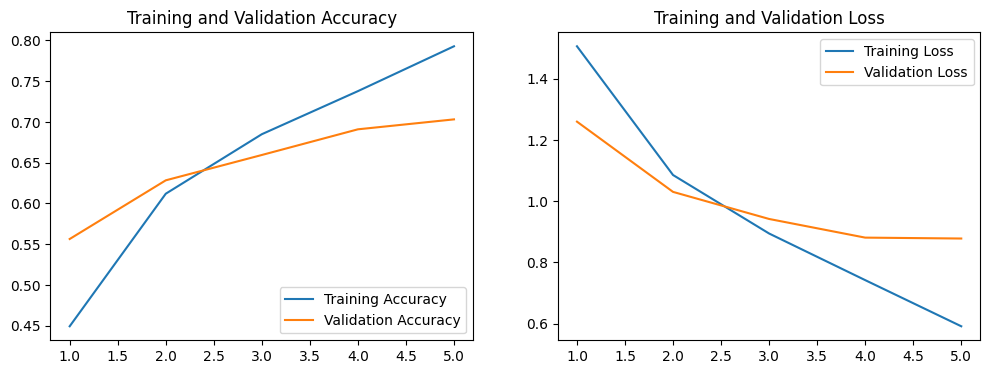

In [19]:
test_loss, test_acc  = model.evaluate(testX.reshape(-1, 32, 32, 3),testY)
print('Training accuracy:', history.history['accuracy'][-1])
print('Testing accuracy:', test_acc)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Step 2 - CNN

In [27]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_2 = model.fit(trainX.reshape(-1,32,32,3), trainY, epochs=5, batch_size=32, validation_data=(valX.reshape(-1, 32, 32, 3), valY))

Epoch 1/5
1250/1250 [==============================] - 407s 324ms/step - loss: 1.4649 - accuracy: 0.4671 - val_loss: 1.2314 - val_accuracy: 0.5603
Epoch 2/5
1250/1250 [==============================] - 426s 341ms/step - loss: 1.0400 - accuracy: 0.6306 - val_loss: 1.0698 - val_accuracy: 0.6187
Epoch 3/5
1250/1250 [==============================] - 431s 345ms/step - loss: 0.7336 - accuracy: 0.7408 - val_loss: 1.0611 - val_accuracy: 0.6381
Epoch 4/5
1250/1250 [==============================] - 597s 478ms/step - loss: 0.4238 - accuracy: 0.8541 - val_loss: 1.2247 - val_accuracy: 0.6366
Epoch 5/5
1250/1250 [==============================] - 435s 348ms/step - loss: 0.1854 - accuracy: 0.9398 - val_loss: 1.4598 - val_accuracy: 0.6387


313/313 [==============================] - 8s 25ms/step - loss: 1.5697 - accuracy: 0.6434
Training accuracy: 0.9611499905586243
Testing accuracy: 0.6434000134468079


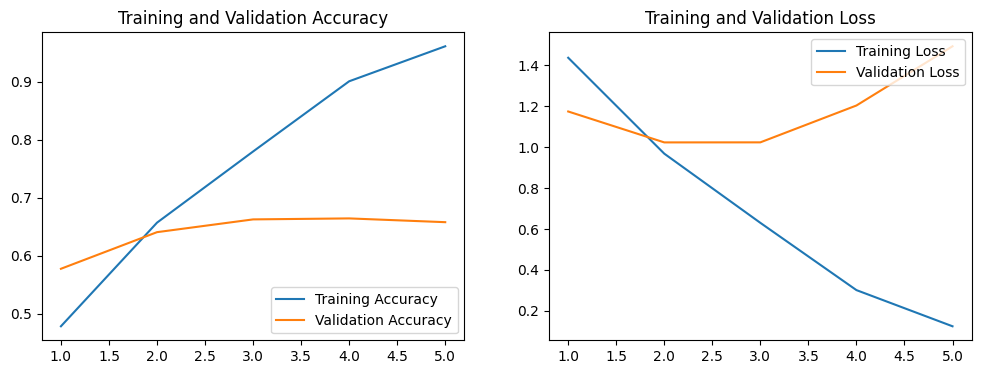

In [21]:
test_loss, test_acc  = model.evaluate(testX.reshape(-1, 32, 32, 3),testY)
print('Training accuracy:', history_2.history['accuracy'][-1])
print('Testing accuracy:', test_acc)

acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Step 3 - CNN

In [22]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dropout(0.2),
    Dense(512, activation='sigmoid'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_3 = model.fit(trainX.reshape(-1,32,32,3), trainY, epochs=5, batch_size=32, validation_data=(valX.reshape(-1, 32, 32, 3), valY))

Epoch 1/5
1250/1250 [==============================] - 54s 42ms/step - loss: 1.5773 - accuracy: 0.4193 - val_loss: 1.2745 - val_accuracy: 0.5408
Epoch 2/5
1250/1250 [==============================] - 51s 41ms/step - loss: 1.2071 - accuracy: 0.5688 - val_loss: 1.1422 - val_accuracy: 0.5985
Epoch 3/5
1250/1250 [==============================] - 51s 41ms/step - loss: 1.0293 - accuracy: 0.6342 - val_loss: 0.9911 - val_accuracy: 0.6513
Epoch 4/5
1250/1250 [==============================] - 51s 41ms/step - loss: 0.8884 - accuracy: 0.6871 - val_loss: 0.9618 - val_accuracy: 0.6645
Epoch 5/5
1250/1250 [==============================] - 53s 42ms/step - loss: 0.7755 - accuracy: 0.7286 - val_loss: 0.9100 - val_accuracy: 0.6795


313/313 [==============================] - 3s 9ms/step - loss: 0.9125 - accuracy: 0.6864
Training accuracy: 0.7285749912261963
Testing accuracy: 0.6863999962806702


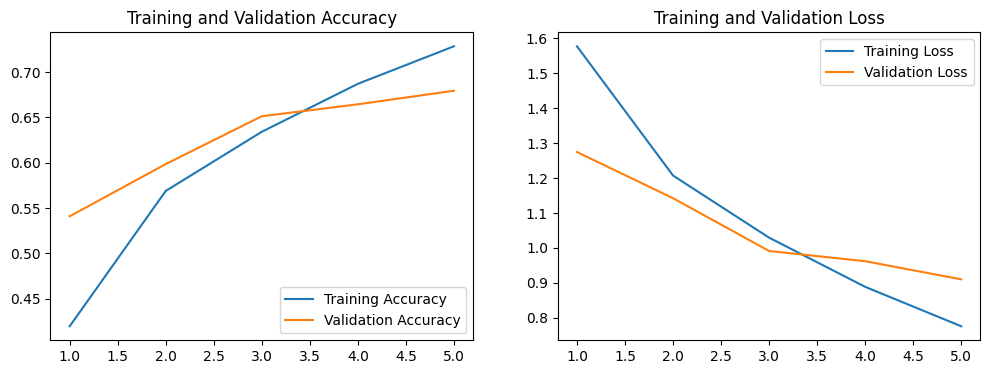

In [23]:
test_loss, test_acc  = model.evaluate(testX.reshape(-1, 32, 32, 3),testY)
print('Training accuracy:', history_3.history['accuracy'][-1])
print('Testing accuracy:', test_acc)

acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()